In [100]:
import pandas as pd

In [101]:
df = pd.read_csv('smokers.csv')
df.head()

,Year,State,Value
0,2015,RI,0.2
1,2015,VT,0.3
2,2017,VA,0.3
3,2017,DE,0.4
4,2015,RI,0.4


# Step 1 [30]: Read file and display the number of rows in the data.

In [3]:
print ('# of Survey: ', len(df.index))

# of Survey:  3519


# Step 2 [30]: Find and display the average number of surveys conducted per state.


In [4]:
df.State.value_counts().mean()
print('# of States: ',df.State.nunique())
print('Average # of Surveys per State: ',df.State.value_counts().mean())

# of States:  51
Average # of Surveys per State:  69.0


# Step 3 [30]: Among the surveys in the data-set, display the minimum and maximum smoking rate.

In [5]:
max_value = df.Value.sort_values(ascending = False).index[0]
min_value = df.Value.sort_values(ascending = True).index[0]

In [6]:
print('Minimum:')
print(df.iloc[min_value, 0], ' ',df.iloc[min_value, 1], ' ', df.iloc[min_value, 2] )
print('Maximum:')
print(df.iloc[max_value, 0], ' ',df.iloc[max_value, 1], ' ', df.iloc[max_value, 2] )

Minimum:
2015   RI   0.2
Maximum:
2003   SD   62.3


# Step 4 [30]: Find average smoker rate per state and display the states with minimum and maximum average

In [7]:
max_avg_state = df.groupby('State').Value.mean().sort_values(ascending = False).index[0]
min_avg_state = df.groupby('State').Value.mean().sort_values(ascending = True).index[0]
max_avg_value = df.groupby('State').Value.mean().max()
min_avg_value = df.groupby('State').Value.mean().min()

In [8]:
print('Min: ', min_avg_state, ' ', min_avg_value )
print('Max: ', max_avg_state, ' ', max_avg_value )

Min:  CA   5.992857142857143
Max:  SD   30.221153846153843


# Step 5 [40]: Same as Step 4 but display the top 10 states instead of min and max.

In [103]:
top10_max_avg_state = df.groupby('State').Value.mean().sort_values(ascending = False).head(10)
top10_min_avg_state = df.groupby('State').Value.mean().sort_values(ascending = True).head(10)
print('Max:')
print(top10_max_avg_state) 
print(' \nMin:')
print(top10_min_avg_state)

Max:
State
SD    30.221154
MT    25.753947
OH    24.541463
AR    23.433871
AL    22.815714
MO    22.193103
US    21.502542
OK    20.953448
WI    20.590476
MS    20.545455
Name: Value, dtype: float64
 
Min:
State
CA     5.992857
DC     6.135897
VA     6.257407
MD     8.934118
RI     9.326364
FL    10.482222
UT    10.710526
PR    10.772727
CO    10.883333
PA    11.385714
Name: Value, dtype: float64


# Step 6 [40]: Get state and year from user and display the surveys for that state for that year

In [20]:
input_year = input(print('Nhap nam: '))
input_state = input(print('Nhap state: '))
input_year = int(input_year)
input_state = str(input_state)
df.query('State == @input_state & Year == @input_year')

Nhap nam: 


None 2017


Nhap state: 


None CA


,Year,State,Value
45,2017,CA,1.6
60,2017,CA,1.8
362,2017,CA,4.6
454,2017,CA,5.4
496,2017,CA,5.7
520,2017,CA,5.9
577,2017,CA,6.4


# Step 7 [50]: Get state from user as input (using input()) and display the average smoker rate year by year. By looking at the most recent 2 years, display if the cigarette use is on decline or rise.

Nhap state: 


None OH


Cigarette use is on Decline in OH


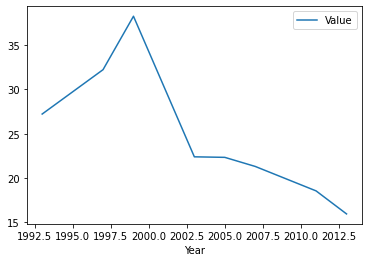

In [99]:
# Nhập Input:
input_state = input(print('Nhap state: '))

# Dựa trên state đã input thì lấy ra giá trị trung bình hút thuốc của state đó qua từng năm
df.query('State == @input_state').groupby('Year').mean()

# Đưa các giá trị năm và tỉ lệ hút thuốc trung bình vào các list
li_year = list(df.query('State == @input_state').groupby('Year').mean().index)
li_value = list(df.query('State == @input_state').groupby('Year').mean().Value)

# nếu thời gian khảo sát ít hơn 2 năm thì không thể đánh giá
if max(li_year) - min(li_year) <= 2:
    print("hmmm... cannot find that state. Compute for another state or enter 'Exit' to exit.")

# nếu thời gian khảo sát ít hơn 2 năm thì đưa ra đánh giá
else: 
    df.query('State == @input_state').groupby('Year').mean().plot()
    
    if li_value[-1] - li_value[-2] >= 0:
        print(f'Cigarette use is on rise in {input_state}')
    elif li_value[-1] - li_value[-2] == 0:
        print(f'Cigarette use is on stable in {input_state}')
    else:
        print(f'Cigarette use is on Decline in {input_state}')